# Houses Kaggle Competition (revisited with Deep Learning 🔥) 

[<img src='https://wagon-public-datasets.s3.amazonaws.com/data-science-images/ML/kaggle-batch-challenge.png' width=600>](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

⚙️ Let's re-use our previous **pipeline** built in the module **`05-07-Ensemble-Methods`** and try to improve our final predictions with a Neural Network!

## (0) Libraries and imports

In [1]:
%load_ext autoreload
%autoreload 2

# DATA MANIPULATION
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# DATA VISUALISATION
import matplotlib.pyplot as plt
import seaborn as sns

# VIEWING OPTIONS IN THE NOTEBOOK
from sklearn import set_config; set_config(display='diagram')

## (1) 🚀 Getting Started

### (1.1) Load the datasets

💾 Let's load our **training dataset**

In [16]:
data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/houses_train_raw.csv")
X = data.drop(columns='SalePrice')
y = data['SalePrice']

In [17]:
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [18]:
X.shape, y.shape

((1460, 80), (1460,))

💾 Let's also load the **test set**

❗️ Remember ❗️ You have access to `X_test` but only Kaggle has `y_test`

In [19]:
X_test = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/houses_test_raw.csv")

In [20]:
X_test.shape

(1459, 80)

### (1.2) Train/Val Split

❓ **Holdout** ❓ 

As you are not allowed to use the test set (and you don't have access to `y_test` anyway), split your dataset into a training set and a validation set.

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_val, y_train, y_val=train_test_split(X, y, test_size=0.2, random_state=42)

### (1.3) Import the preprocessor

🎁 You will find in `utils/preprocessor.py` the **`data-preprocessing pipeline`** that was built in our previous iteration.

❓ Run the cell below, and make sure you understand what the pipeline does. Look at the code in `preprocessor.py` ❓

In [23]:
from utils.preprocessor import create_preproc

preproc = create_preproc(X_train)
preproc

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical_encoder',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['1stFlrSF', '2ndFlrSF',
                                                   '3SsnPorch', 'BedroomAbvGr',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'BsmtUnfSF',
                                                   'EnclosedPorch',
                                                   'Fireplaces', 'FullBath',
                                                   'GarageArea', 'GarageCars...
                                                   'CentralAir', 'Condition1',
                                                   'Condition2', 'Exterior1st',
                                                   'Exterior2nd', 'Foundation',
                                                   'GarageType', 'Heating',
                                                   'HouseStyle', 'LotConfig',
                                                   'MSZoning', 'MasVnrType',
                                                   'MiscFeature',
                                                   'Neighborhood', 'RoofMatl',
                                                   'RoofStyle', 'SaleCondition',
                                                   'SaleType', 'Street',
                                                   'Utilities'])])),
                ('selectpercentile',
                 SelectPercentile(percentile=75,
                                  score_func=<function mutual_info_regression at 0x7f6b16625750>))])

❓ **Scaling your numerical features and encoding the categorical features** ❓

Apply these transformations to _both_ your training set and your validation set.

In [24]:
X_train_transformed = preproc.fit_transform(X_train, y_train)
X_val_transformed = preproc.transform(X_val)
X_test_transformed = preproc.transform(X_test)

In [25]:
X_train_transformed.shape

(1168, 162)

In [26]:
X_val_transformed.shape

(292, 162)

In [27]:
X_test_transformed.shape

(1459, 162)

## (2) 🔮 Your predictions in Tensorflow/Keras

🚀 This is your first **regression** task with Keras! 

💡 Here a few tips to get started:
- Kaggle's [rule](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation) requires to minimize **`rmsle`** (Root Mean Square Log Error). 
    - As you can see, we can specify `msle` directly as a loss-function with Tensorflow.Keras!
    - Just remember to take the square-root of your loss results to read your rmsle metric.
    
    
😃 The best boosted-tree ***rmsle*** score to beat is around ***0.13***

---

<img src="https://i.pinimg.com/564x/4c/fe/ef/4cfeef34af09973211f584e8307b433c.jpg" alt="`Impossible mission" style="height: 300px; width:500px;"/>

---


❓ **Your mission, should you choose to accept it:** ❓
- 💪 Beat the best boosted-tree 💪 

    - Your responsibilities are:
        - to build the ***best neural network architecture*** possible,
        - and to control the number of epochs to ***avoid overfitting***.

### (2.1) Predicting the houses' prices using a Neural Network

❓ **Preliminary Question: Initializing a Neural Network** ❓

Create a function `initialize_model` which initializes a Dense Neural network:
- You are responsible for designing the architecture (number of layers, number of neurons)
- The function should also compile the model with the following parameters:
    - ***optimizer = "adam"***
    - ***loss = "msle"*** (_Optimizing directly for the Squared Log Error!_)
        

In [77]:
from tensorflow.keras import models, layers, optimizers, regularizers, callbacks

❓ **Questions/Guidance** ❓

1. Initialize a Neural Network
2. Train it
3. Evaluate its performance
4. Is the model overfitting the dataset? 

In [171]:
def initialize_model():
    
    model=models.Sequential()
    model.add(layers.Dense(160, activation="relu", input_shape=(162,), kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dense(80, activation="relu", kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dense(40, activation="relu"))
    model.add(layers.Dense(8, activation="relu"))
    
    model.add(layers.Dense(1, activation="linear"))
    
    model.compile(
        optimizer=optimizers.Adam(learning_rate=0.005),
        loss="msle",                                                            
    )
    
    return model 

In [174]:
model=initialize_model()

# Add early stopping and learning rate scheduler
early_stop = callbacks.EarlyStopping(patience=10, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

In [175]:
history = model.fit(
    X_train_transformed, y_train, 
    validation_data=(X_val_transformed, y_val),  # Pass validation data here
    epochs=1000, 
    batch_size=16, 
    callbacks=[early_stop, reduce_lr],
    verbose=0
)

In [176]:
results=model.evaluate(X_val_transformed, y_val, batch_size=16)

19/19 [==============================] - 0s 2ms/step - loss: 0.0340


🎁 We coded a `plot_history` function that you can use to detect overfitting

In [177]:
def plot_history(history):
    plt.figure(figsize=(12,6))
    plt.plot(np.sqrt(history.history['loss']))
    plt.plot(np.sqrt(history.history['val_loss']))
    plt.title('Model Loss')
    plt.ylabel('RMSLE')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='best')
    plt.show()

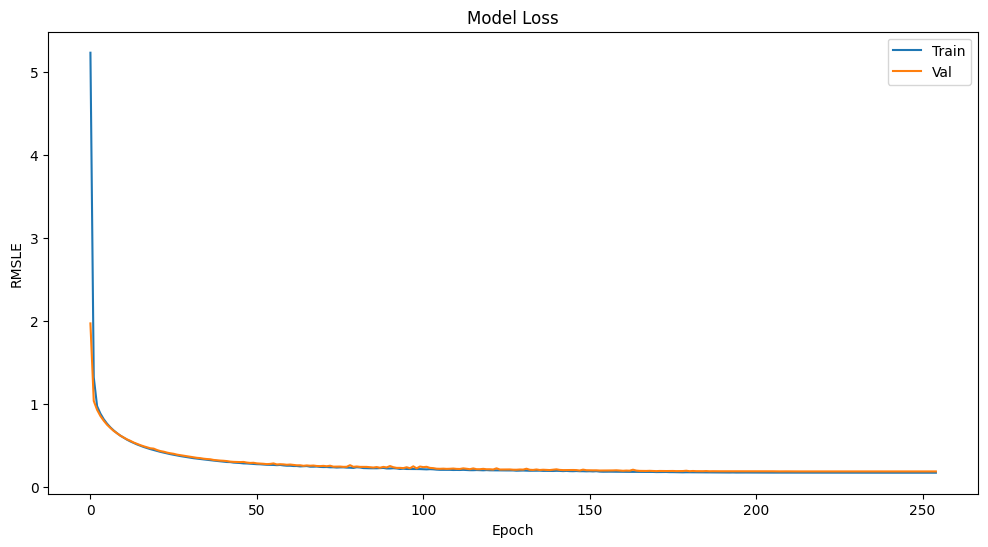

In [178]:
plot_history(history)

### (2.2) Challenging yourself

🤔 **Questions to challenge yourself:**
- Are you satisfied with your score?
- Before publishing it, ask yourself whether you could really trust it or not?
- Have you cross-validated your neural network? 
    - Feel free to cross-validate it manually with a *for loop* in Python to make sure that your results are robust against the randomness of a _train-val split_ before before submitting to Kaggle

❓ Create a function `evaluate_model` following the framework below 👇 then use a for loop with `KFold` to manually cross validate your model!

In [154]:
from sklearn.model_selection import KFold

In [179]:
def evaluate_model(X, y, train_index, val_index):
    
    # Slicing the training set and the validation set
    
    X_train, X_val, y_train, y_val=train_test_split(X, y, test_size=0.2, random_state=42)
    
    
    # Preprocessing
    preproc = create_preproc(X_train)
    
    X_train_transformed = preproc.fit_transform(X_train, y_train)
    X_val_transformed = preproc.transform(X_val)
    X_test_transformed = preproc.transform(X_test)

    
    # Training the model on the preprocessed training dataset
    model = initialize_model()
    
    history = model.fit(
        X_train_transformed, y_train, 
        validation_data=(X_val_transformed, y_val),
        epochs=1000, 
        batch_size=16, 
        callbacks=[early_stop, reduce_lr],
        verbose=0
    )
    
    # Evaluating the model on the preprocessed validation dataset
    results = model.evaluate(X_val_transformed, y_val, verbose=0)
    rmsle_final_epoch = np.sqrt(results)  # Final RMSLE at last epoch
    rmsle_min = np.sqrt(np.min(history.history['val_loss']))  # Best RMSLE during training
    
    return pd.DataFrame({
        'rmsle_final_epoch': [rmsle_final_epoch],
        'rmsle_min': [rmsle_min]
    })

In [180]:
kf=KFold(n_splits=5, shuffle=True, random_state=42)


all_results = []

for train_index, val_index in kf.split(X, y):
    result = evaluate_model(X, y, train_index, val_index)
    all_results.append(result)

# Combine results into a single DataFrame
final_results = pd.concat(all_results, ignore_index=True)

# Calculate average metrics across folds
average_rmsle_final = final_results['rmsle_final_epoch'].mean()
average_rmsle_min = final_results['rmsle_min'].mean()

print(f"Average RMSLE (Final Epoch): {average_rmsle_final}")
print(f"Average RMSLE (Best): {average_rmsle_min}")

Average RMSLE (Final Epoch): 0.198504347954312
Average RMSLE (Best): 0.1985043512998067


### (2.3) (Bonus) Using all your CPU cores to run Neural Networks

🔥 **BONUS** 🔥 **Multiprocessing computing using [dask](https://docs.dask.org/en/latest/delayed.html)** and **all your CPU cores**:

_(to mimic SkLearn's `n_jobs=-1`)_

In [157]:
!pip install --quiet dask


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip


In [ ]:
from sklearn.model_selection import KFold
from dask import delayed

cv = 5
kf = KFold(n_splits = cv, shuffle = True)
f = delayed(evaluate_model)

results = delayed([f(X, y, train_index, val_index) for (train_index, val_index) in kf.split(X)
                   ]).compute(
                       scheduler='processes', num_workers=8)

pd.concat(results, axis=0).reset_index(drop=True)

INFO:tensorflow:Assets written to: ram://79bb488f-5d07-426a-84bd-7d8703bf27b4/assets
INFO:tensorflow:Assets written to: ram://bd1c4240-5c76-49eb-af26-d05586224fcd/assets
INFO:tensorflow:Assets written to: ram://19e81686-d709-44b4-860d-58977dd74559/assets
INFO:tensorflow:Assets written to: ram://bbec13cd-d420-4b78-ab8e-df6b3211d89e/assets
INFO:tensorflow:Assets written to: ram://47bcc7a4-77aa-4b82-b018-10e5b536059b/assets


2024-11-25 17:45:09.516415: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-25 17:45:11.208635: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### (2.4) (Bonus) Multiprocessing with Python


**multiprocessing with default Python library**

References :
* [Yitong Ren - Speeding Up and Perfecting Your Work Using Parallel Computing](https://towardsdatascience.com/speeding-up-and-perfecting-your-work-using-parallel-computing-8bc2f0c073f8)
* [Johaupt Github - Parallel Processing for Cross Validation - BROKEN LINK](https://johaupt.github.io/python/parallel%20processing/cross-validation/multiprocessing_cross_validation.html)

In [139]:
# This code will fail try to debug it yourself if you cannot checkout the hints below
import multiprocessing as mp
pool = mp.Pool(processes=2) #mp.cpu_count()-1)

results = []
def log_result(x):
    results.append(x)
    
for train_index, val_index in kf.split(X):
    pool.apply_async(
        evaluate_model,
        args=(X, y, train_index, val_index),
        callback = log_result)

# Close the pool for new tasks
pool.close()

# Wait for all tasks to complete at this point
pool.join()

result = pd.concat(results, axis=0)

KeyboardInterrupt: 

<details>
    <summary markdown='span'>Hints</summary>

This is a limitation of multiprocessing in ipython enviroments this code would work fine in .py file.
The key error is `AttributeError: Can't get attribute 'evaluate_model' on <module 'main' (built-in)>`

Checkout this stackoverflow for a workaround https://stackoverflow.com/questions/41385708/multiprocessing-example-giving-attributeerror !
</details>

## (3) 🏅FINAL SUBMISSION

🦄 Predict the ***prices of the houses in your test set*** and submit your results to Kaggle! 



In [142]:
# X_test = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/houses_test_raw.csv")
# X_test_preproc = preproc.transform(X_test)
# ALREADY DONE ABOVE

In [181]:
predictions = model.predict(X_test_transformed).flatten()

46/46 [==============================] - 0s 2ms/step


💾 Save your predictions in a Dataframe called `results` with the format required by Kaggle so that when you export it to a `.csv`, Kaggle can read it.

In [182]:
# Prepare results DataFrame
results=pd.DataFrame({
    'Id': X_test['Id'],  # Ensure 'Id' is in X_test
    'SalePrice': predictions
})

📤  Export your results using Kaggle's submission format and submit it online!

_(Uncomment the last cell of this notebook)_

In [161]:
# Export results to CSV
results.to_csv("submission_final.csv", header=True, index=False)

print("Predictions saved to 'submission_final.csv'.")

Predictions saved to 'submission_final.csv'.


---

🏁 Congratulations!

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... it's time for the Recap!

In [146]:
!git add houses_kaggle_competition_bis.ipynb

In [147]:
!git commit -m "House Kaggle Competition"

[master 8c44b77] House Kaggle Competition
 1 file changed, 1200 insertions(+), 63 deletions(-)


In [148]:
!git push origin master

Enumerating objects: 11, done.
Counting objects: 100% (11/11), done.
Delta compression using up to 8 threads
Compressing objects: 100% (10/10), done.
Writing objects: 100% (11/11), 38.39 KiB | 9.60 MiB/s, done.
Total 11 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), done.
To github.com:Gokhan-Dede/data-houses-kaggle-competition-bis.git
 * [new branch]      master -> master
